In [1]:
import pandas as pd
df = pd.read_csv('ex1data2.txt', header = None)
df.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [2]:
m = len(df)

In [3]:
m

47

In [4]:
df = pd.concat([pd.Series(1, index=df.index, name='00'), df], axis=1)
df.head()

,00,0,1,2
0,1,2104,3,399900
1,1,1600,3,329900
2,1,2400,3,369000
3,1,1416,2,232000
4,1,3000,4,539900


In [6]:
import numpy as np
np.sum(df, axis=1).head()

0    402008
1    331504
2    371404
3    233419
4    542905
dtype: int64

In [7]:
y = df.iloc[:, 3]

In [8]:
X = df.drop(columns=2)
X.head()

,00,0,1
0,1,2104,3
1,1,1600,3
2,1,2400,3
3,1,1416,2
4,1,3000,4


In [9]:
for i in range(1, len(X.columns)):
    X[i-1] = X[i-1]/np.max(X[i-1])

In [10]:
X.head()

,00,0,1
0,1,0.469853,0.6
1,1,0.357302,0.6
2,1,0.535954,0.6
3,1,0.316213,0.4
4,1,0.669942,0.8


In [11]:
import numpy as np
np.array([0]*len(X.columns))

array([0, 0, 0])

In [12]:
theta = np.array([0]*len(X.columns))

In [13]:
y1 = theta*X
y1=np.sum(y1, axis=1)

In [14]:
cost = sum(np.sqrt((y1-y)**2))/(2*len(df))
cost

170206.32978723405

In [15]:
alpha=0.01
0-alpha*(sum((y1-y)*X.iloc[:,0])/47) 

3404.1265957446813

In [16]:
def hypothesis(theta, X):
    return theta*X

In [17]:
def computeCost(X, y, theta):
    y1 = hypothesis(theta, X)
    y1=np.sum(y1, axis=1)
    return sum(np.sqrt((y1-y)**2))/(2*47)

In [18]:
alpha=0.05
i=1500
theta = np.array([0.0]*len(X.columns))
def gradientDescent(X, y, theta, alpha, i):
    #theta = np.array([0]*len(X.columns))
    J = []
    k = 0
    while k < i:        
        y1 = hypothesis(theta, X)
        y1 = np.sum(y1, axis=1)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*(sum((y1-y)*X.iloc[:,c])/len(X))
        j = computeCost(X, y, theta)
        J.append(j)
        k += 1
    return J, j, theta

In [67]:
J, j, theta = gradientDescent(X, y, theta, 0.05, 10000)

In [68]:
y_hat = hypothesis(theta, X)
y_hat = np.sum(y_hat, axis=1)

In [61]:
range(len(y))

range(0, 47)

In [69]:
y_hat

0     356283.051438
1     286120.953677
2     397489.362821
3     269244.015544
4     472277.873709
5     330979.204608
6     276933.059923
7     262037.535200
8     255494.641163
9     271364.639466
10    324714.731594
11    341805.158249
12    326492.001992
13    669293.213632
14    239903.063883
15    374830.515708
16    255879.806447
17    235448.327517
18    417846.563740
19    476593.399563
20    309369.109086
21    334951.376939
22    286677.795723
23    327777.362845
24    604913.024851
25    216515.697962
26    266353.061054
27    415029.887261
28    369647.260535
29    430482.254030
30    328130.061879
31    220070.238759
32    338635.782737
33    500087.509745
34    306756.575619
35    263429.640314
36    235865.959051
37    351443.149788
38    641418.645096
39    355619.465131
40    303768.222379
41    374937.259969
42    411999.722260
43    230436.749105
44    190729.287098
45    312464.206588
46    230854.380640
dtype: float64

In [23]:
len(y)

47

In [33]:
len(y_hat)

47

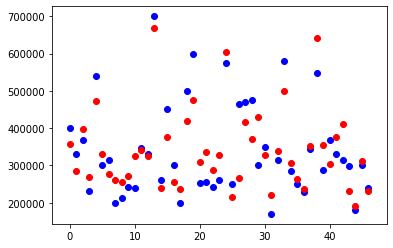

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=list(range(0, 47)),y= y, color='blue')         
plt.scatter(x=list(range(0, 47)), y=y_hat, color='red')
plt.show()

In [172]:
X2 = df.drop(columns=2)

In [173]:
X1 = np.sum(X, axis=1)

In [174]:
X2_sum = np.sum(X2, axis=1)

In [72]:
cost = sum(np.sqrt((y_hat-y)**2))/(2*len(df))
cost

25751.391715683636

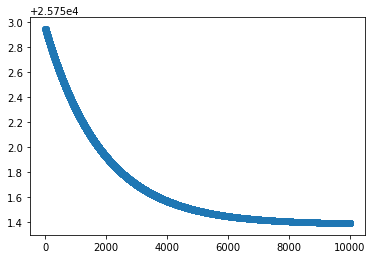

In [73]:
plt.figure()
plt.scatter(x=list(range(0, 10000)), y=J)
plt.show()